## Imports

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder

## Constants with respect to the file

In [2]:
BASE_DIR = Path.cwd().parent

TRAIN_DATA_FILE_PATH = BASE_DIR / 'datasets/train.csv'

# EDA

In [3]:
train_df=pd.read_csv(TRAIN_DATA_FILE_PATH)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


- Changing boolean values in features:   
    True -> 1   
    False -> 0

In [5]:
BOOL_COLS=[
    'CryoSleep',
    'VIP',
    'Transported'
]

train_df[BOOL_COLS]=train_df[BOOL_COLS].astype('Int64')

train_df['CryoSleep'].unique()

<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64

### Handling Missing Values

In [6]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: >

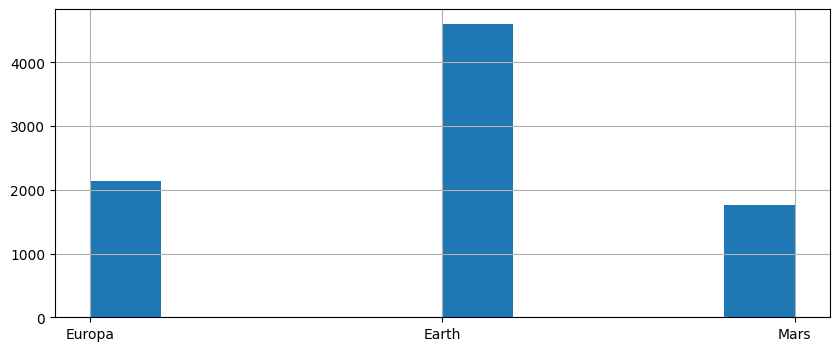

In [7]:
train_df['HomePlanet'].hist(figsize=(10,4))

In [8]:
# Categorical columns to which One Hot Encoding will be applied
CATEGORICAL_COLS = [
    'HomePlanet',
    'Destination'
]

# Handle missing values by filling with a placeholder
train_df[CATEGORICAL_COLS] = train_df[CATEGORICAL_COLS].fillna('Unknown')

# Testing
train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Unknown'],
      dtype=object)

- Applying the OneHotEncoder to columns `HomePlanet` and `Destination`

In [9]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(train_df[CATEGORICAL_COLS])

# Convert the encoded features into a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Drop the original categorical columns and concatenate the encoded features
train_df = pd.concat([train_df.drop(columns=CATEGORICAL_COLS), encoded_df], axis=1)

In [11]:
train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
